# Gender Recognition by Voice

## 1) Exploring the data

In [181]:
import pandas as pd

voice = pd.read_csv('voice.csv')
print(voice.head())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...    0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...    0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...    0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...    0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...    0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812

In [182]:
voice["label"].value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [183]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


## 2) Data visualization

C:\Users\Slava\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


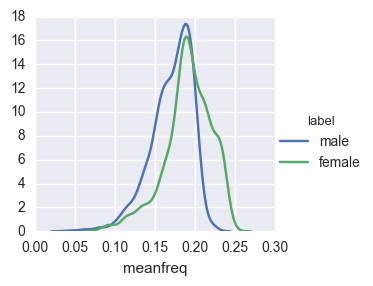

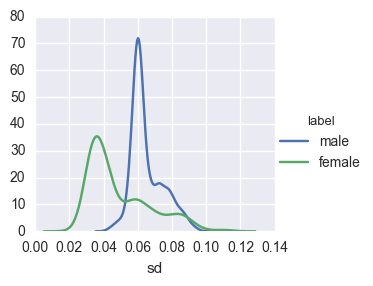

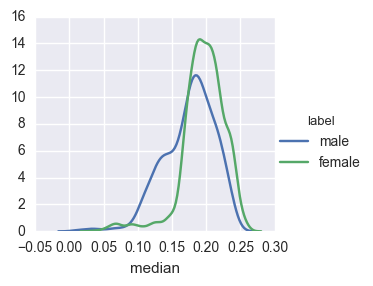

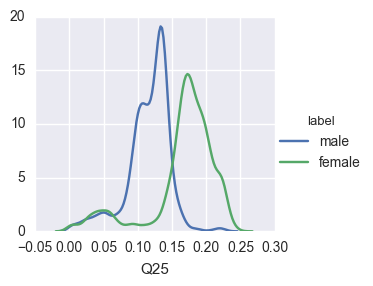

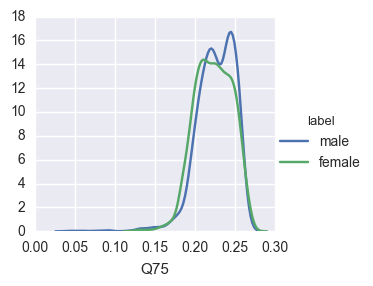

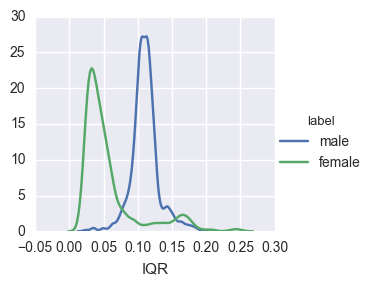

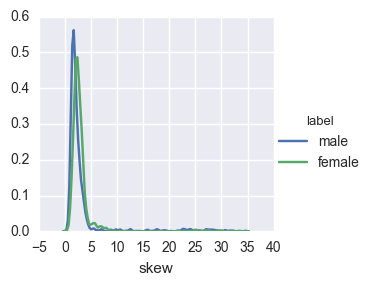

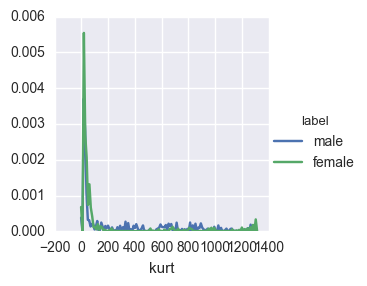

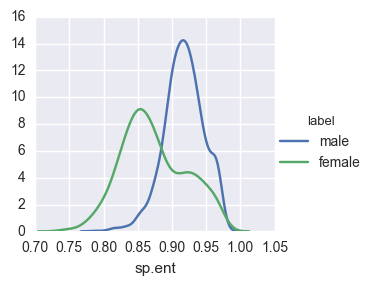

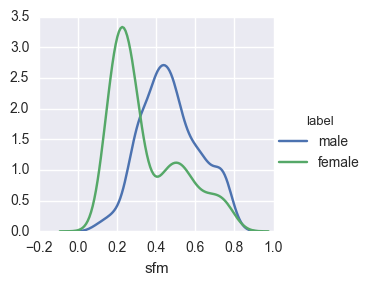

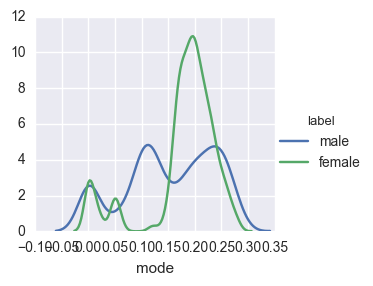

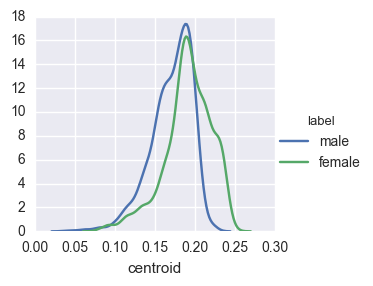

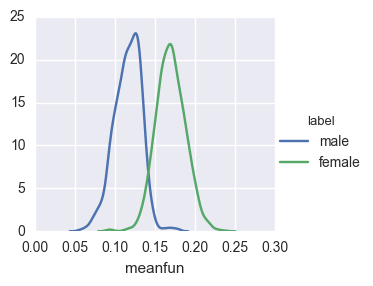

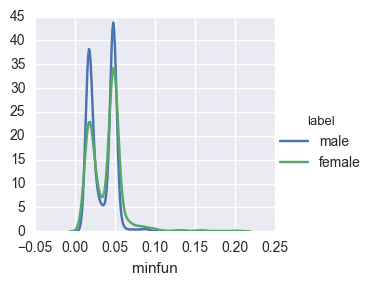

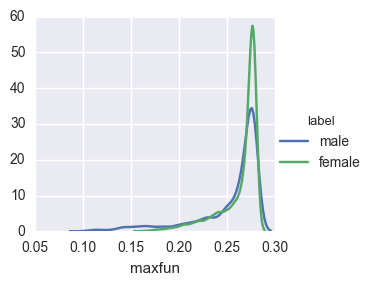

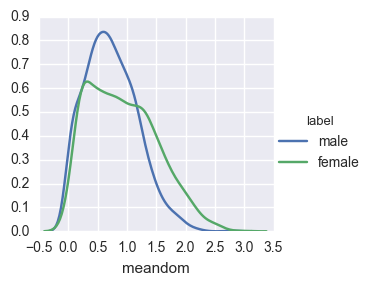

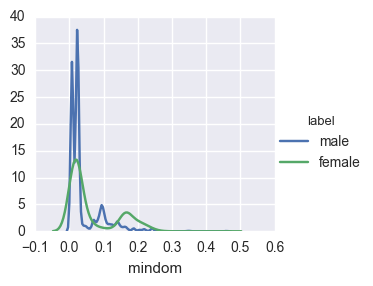

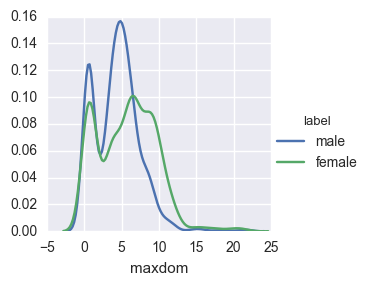

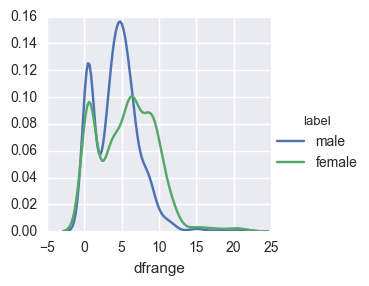

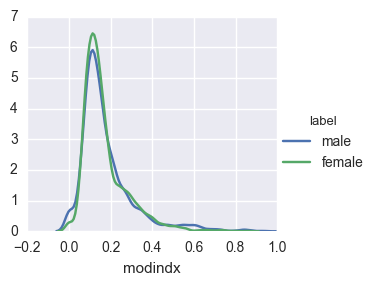

In [184]:
import seaborn as sns
from seaborn import plt

for col in voice.columns[:-1]:
    sns.FacetGrid(voice, hue="label", size=3).map(sns.kdeplot, col).add_legend()
    plt.show()
    

At first glance, most significent features are IQR and meanfun.

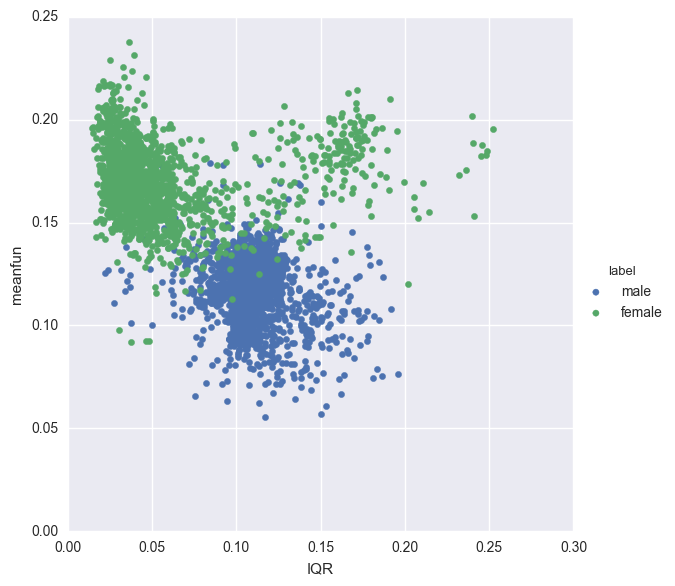

In [185]:
sns.FacetGrid(voice, hue="label", size=6).map(plt.scatter, "IQR", "meanfun").add_legend()
plt.show()

### Converting string label's value to int

In [186]:
from sklearn.preprocessing import LabelEncoder

# replace male/female => 1/0
gender_encoder = LabelEncoder()
voice['label'] = gender_encoder.fit_transform(voice.iloc[:, -1])

### Separating data in train and test

In [187]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(voice, test_size=0.2, random_state=2)

# separating data in features and labels
x_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
x_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

## 3) Implementation of models

### Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)

print('LR result: ', accuracy_score(y_test, prediction))

LR result:  0.881703470032


### K-means

In [189]:
from sklearn.cluster import KMeans
import math

result = 0
for num_clusters in range(1, len(x_train)):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(x_train, y_train)
    prediction = kmeans.predict(x_test)
    cur_result = accuracy_score(y_test, prediction)
    if cur_result < result or math.fabs(cur_result-result) < 0.01:
        break
    result = cur_result 

print('K-means result: ', result, '. Cluster quantity = ', num_clusters-1) 

K-means result:  0.544164037855 . Cluster quantity =  2


### SVM

In [190]:
from sklearn.svm import SVC
from sklearn import metrics

svc=SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print('SVM result: ', accuracy_score(y_test,y_pred))

SVM result:  0.717665615142


### Naive Bayes

In [191]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
prediction = nb.predict(x_test)

print('Simple NB result: ', accuracy_score(y_test, prediction))

Simple NB result:  0.854889589905


### Random Forest

In [192]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier()
rforest.fit(x_train, y_train)
prediction = rforest.predict(x_test)

print('Random Forest result: ', accuracy_score(y_test, prediction))

Random Forest result:  0.970031545741
